<a href="https://colab.research.google.com/github/ArunadeviRamesh/Simple-Decision-Stump-algorithm-for-a-classification/blob/main/Decision_Stump_algorithm_for_a_Diabetes_classification_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import requests
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("/content/diabetes.csv", header=None, names=col_names)

In [2]:
def compute_impurity(feature, impurity_criterion):
    probs = feature.value_counts(normalize=True)
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
    return(round(impurity, 3))

In [3]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
        
    target_entropy = compute_impurity(df[target], split_criterion)
    entropy_list = list()
    weight_list = list()
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)
    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    print('====================')
    return(information_gain)

In [4]:
df['label'].value_counts()

0    851
1    449
Name: label, dtype: int64

In [5]:
import numpy as np
split_criteria = 'gini'
for feature in df.drop(columns='label').columns:
    feature_info_gain = comp_feature_information_gain(df, 'label', feature, split_criteria)


target feature: label
descriptive_feature: pregnant
split criterion: gini
impurity of partitions: [0.404, 0.328, 0.49, 0.448, 0.482, 0.456, 0.49, 0.304, 0.46, 0.496, 0.476, 0.457, 0.5, 0.0, 0.0, 0.498, 0.0]
weights of partitions: [0.068, 0.175, 0.05, 0.152, 0.074, 0.101, 0.027, 0.132, 0.09, 0.054, 0.035, 0.013, 0.011, 0.001, 0.002, 0.013, 0.003]
remaining impurity: 0.41530900000000004
information gain: 0.036690999999999974
target feature: label
descriptive_feature: glucose
split criterion: gini
impurity of partitions: [0.408, 0.26, 0.48, 0.0, 0.26, 0.278, 0.245, 0.492, 0.408, 0.491, 0.0, 0.0, 0.408, 0.408, 0.48, 0.337, 0.42, 0.415, 0.142, 0.26, 0.0, 0.0, 0.444, 0.397, 0.397, 0.231, 0.245, 0.332, 0.495, 0.355, 0.231, 0.231, 0.408, 0.444, 0.42, 0.278, 0.278, 0.219, 0.469, 0.159, 0.0, 0.444, 0.444, 0.0, 0.386, 0.26, 0.0, 0.48, 0.0, 0.0, 0.188, 0.0, 0.5, 0.188, 0.397, 0.491, 0.0, 0.494, 0.0, 0.494, 0.454, 0.494, 0.0, 0.0, 0.486, 0.198, 0.337, 0.0, 0.397, 0.444, 0.497, 0.165, 0.0, 0.5, 0.0,

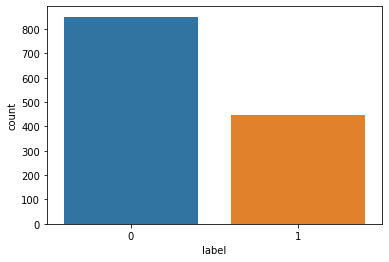

In [9]:
import seaborn as sns
sns.countplot(x=df['label'],data=df)

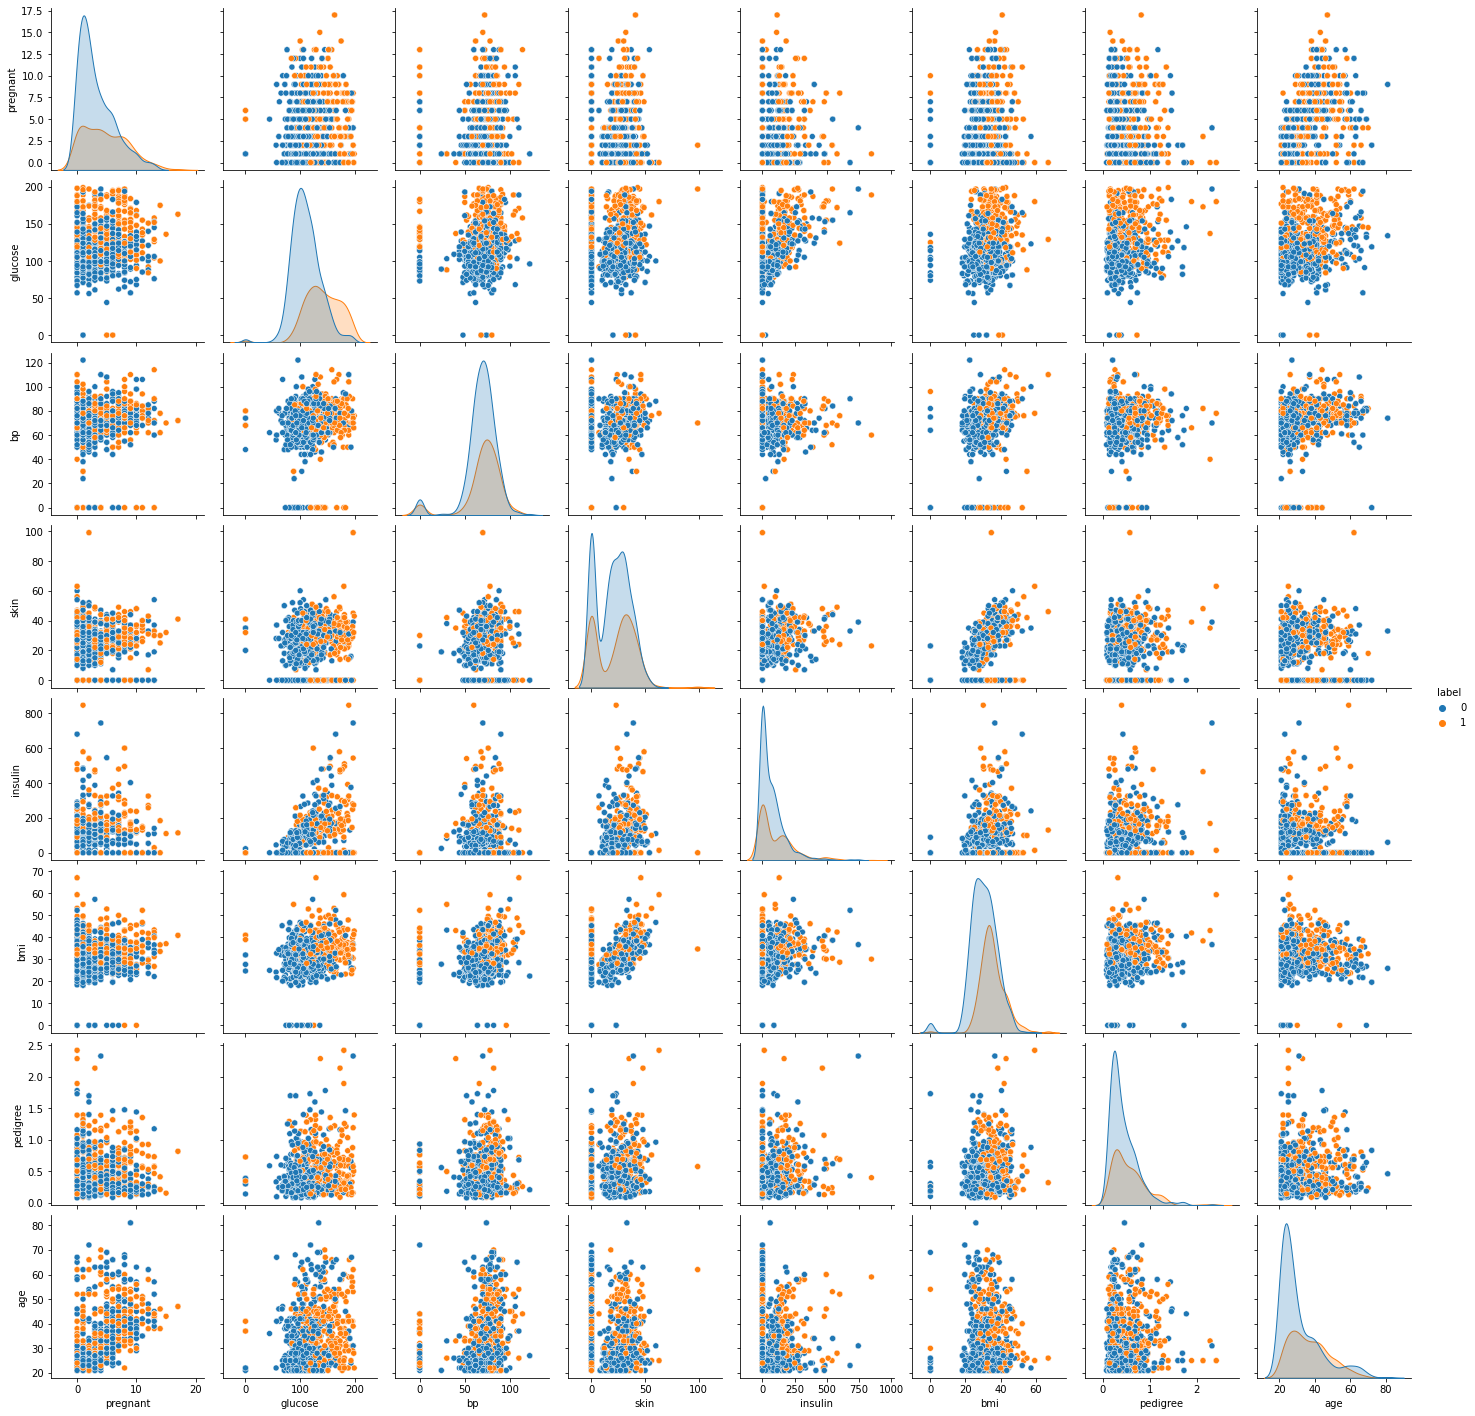

In [10]:
sns.pairplot(df,hue="label")

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

1000 data points dataset with a minimum of 10 feature dimensions.

In [12]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("/content/diabetes.csv", header=None, names=col_names)

In [13]:
df.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [14]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [15]:
len(X)

1300

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [19]:
import time
a=time.time()
clf = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf = clf.fit(X_train,y_train)
b=time.time()
t=b-a
u=t
print("Time taken",t,"sec")


Time taken 0.0037689208984375 sec


In [20]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7410256410256411


GINI- Information gain


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


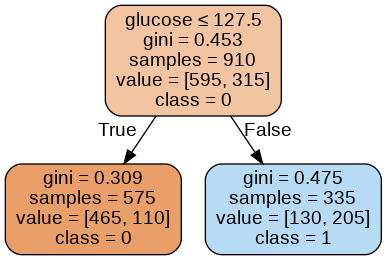

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
print("GINI- Information gain")
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('result.png')
Image(graph.create_png())


In [22]:
y_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Training performance")
from sklearn import metrics
expected_y  = y_train
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y,y_pred))
print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))
print('________________________________________________________________')
print("Testing Performance")
from sklearn import metrics
expected_y  = y_test
y_pred = clf.predict(X_test)
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y,y_pred))
print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))

Accuracy: 0.7362637362637363
Training performance

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       595
           1       0.61      0.65      0.63       315

    accuracy                           0.74       910
   macro avg       0.71      0.72      0.71       910
weighted avg       0.74      0.74      0.74       910


[[465 130]
 [110 205]]
Accuracy:   0.7362637362637363
________________________________________________________________
Testing Performance

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       256
           1       0.61      0.66      0.64       134

    accuracy                           0.74       390
   macro avg       0.72      0.72      0.72       390
weighted avg       0.75      0.74      0.74       390


[[200  56]
 [ 45  89]]
Accuracy:   0.7410256410256411


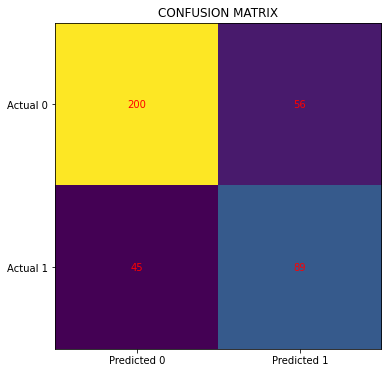

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title("CONFUSION MATRIX")
plt.show()

5000 data points dataset with a minimum of 10 feature dimensions.

In [24]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df1 = pd.read_csv("/content/diabetes_5000.csv", header=None, names=col_names)

In [25]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df1[feature_cols] # Features
y = df1.label # Target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [27]:
a=time.time()
clf = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf = clf.fit(X_train,y_train)
b=time.time()
t=b-a
v=t
print("Time taken",t,"sec")

Time taken 0.008473634719848633 sec


In [28]:
y_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Training performance")
from sklearn import metrics
expected_y  = y_train
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y,y_pred))
print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))
print('________________________________________________________________')
print("Testing Performance")
from sklearn import metrics
expected_y  = y_test
y_pred = clf.predict(X_test)
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y,y_pred))
print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))

Accuracy: 0.7414835164835165
Training performance

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2383
           1       0.62      0.67      0.64      1257

    accuracy                           0.74      3640
   macro avg       0.72      0.72      0.72      3640
weighted avg       0.75      0.74      0.74      3640


[[1855  528]
 [ 413  844]]
Accuracy:   0.7414835164835165
________________________________________________________________
Testing Performance

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1021
           1       0.61      0.62      0.61       539

    accuracy                           0.73      1560
   macro avg       0.70      0.70      0.70      1560
weighted avg       0.73      0.73      0.73      1560


[[805 216]
 [207 332]]
Accuracy:   0.7288461538461538


GINI- Information gain


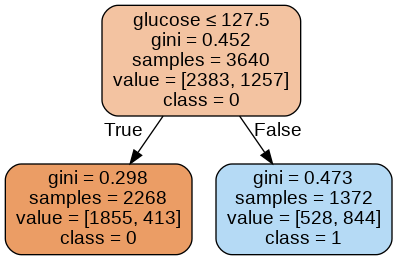

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
print("GINI- Information gain")
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('result.png')
Image(graph.create_png())


10000 data points dataset with a minimum of 10 feature dimensions text



In [30]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df2 = pd.read_csv("/content/diabetes_10000.csv", header=None, names=col_names)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df2[feature_cols] # Features
y = df2.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [31]:
a=time.time()
clf = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf = clf.fit(X_train,y_train)
b=time.time()
t=b-a
w=t
print("Time taken",t,"sec")

Time taken 0.010200023651123047 sec


In [32]:
y_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Training performance")
from sklearn import metrics
expected_y  = y_train
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y,y_pred))
print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))
print('________________________________________________________________')
print("Testing Performance")
from sklearn import metrics
expected_y  = y_test
y_pred = clf.predict(X_test)
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y,y_pred))
print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))

Accuracy: 0.7368131868131869
Training performance

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4792
           1       0.61      0.65      0.63      2488

    accuracy                           0.74      7280
   macro avg       0.71      0.72      0.71      7280
weighted avg       0.74      0.74      0.74      7280


[[3752 1040]
 [ 876 1612]]
Accuracy:   0.7368131868131869
________________________________________________________________
Testing Performance

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2016
           1       0.62      0.67      0.65      1104

    accuracy                           0.74      3120
   macro avg       0.72      0.72      0.72      3120
weighted avg       0.74      0.74      0.74      3120


[[1568  448]
 [ 364  740]]
Accuracy:   0.7397435897435898


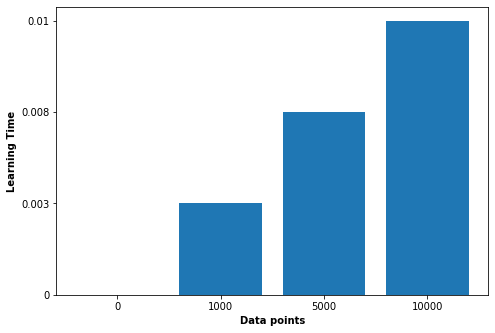

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0','1000','5000','10000']
students = ['0','0.003','0.008','0.01']
ax.bar(langs,students)
plt.ylabel('Learning Time', fontweight='bold')
plt.xlabel('Data points', fontweight='bold')
plt.show()